In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from mpl_toolkits.mplot3d import Axes3D

#nie wiem czy to czegoś nie popsuje 
%matplotlib notebook

In [10]:
def generate_2D_linespace(startx=-10,stopx=11,starty=-10,stopy=11,step=1):
    xs=[]
    ys=[]
    for i in range (startx,stopx,step):
        for j in range(starty,stopy,step):
            xs.append(i)
            ys.append(j)
    return xs,ys




def paraboloid_eqn_noise(data,a,b):
    
    x,y=data
    noise = np.random.normal(-2,2,len(x))
    return -((x/a)**2+(y/b)**2)+noise   

def paraboloid_eqn(data,a,b,eps):
    
    x,y=data
    return -((x/a)**2+(y/b)**2)+eps


def fit_paraboloid(x,y,z):
    data=np.vstack((x,y))
    popt,pcov=opt.curve_fit(paraboloid_eqn,data,z,p0=[-10,-10,1.0])
    return popt,pcov

def show_fit(x,y,z,popt):
    fig=plt.figure()
    ax=fig.add_subplot(111,projection='3d')
    ax.scatter3D(x,y,z)
    data=np.vstack((x,y))
#     ax.scatter3D(x,y,paraboloid_eqn(data,*popt))
    plt.show()

<IPython.core.display.Javascript object>


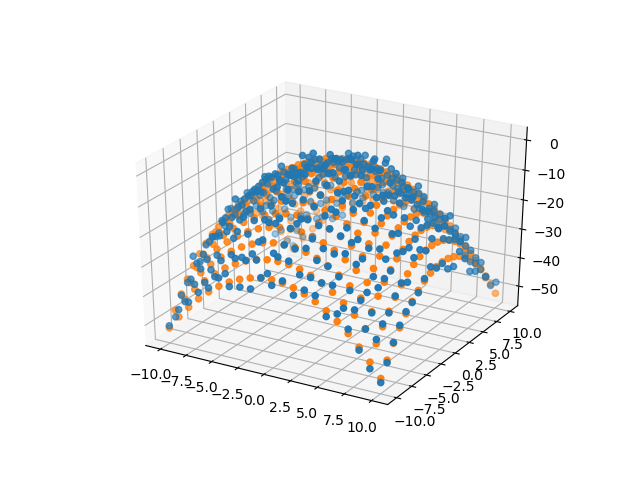

[ 0.01127759  0.01117005  0.16990004]


In [5]:

#Test
xs,ys=generate_2D_linespace()

data=np.vstack((xs,ys))
zdata=paraboloid_eqn_noise(data,2,2)

popt,pcov=opt.curve_fit(paraboloid_eqn,data,zdata,p0=[2,2,10])

show_fit(xs,ys,zdata,popt)

#Calculate standard deviation errors
perr = np.sqrt(np.diag(pcov))
print(perr)

In [60]:
a=np.loadtxt('test')
# a=np.load('test.npy')
data =  np.loadtxt('data.np')

a=a.astype(int)
a=np.array(a)

h_list=[]
a_list=[]
b_list=[]
for peak in a:

    
    

    
    size=8
    x,y=generate_2D_linespace(startx=peak[0]-size,stopx=peak[0]+size,starty=peak[1]-size,stopy=peak[1]+size,step=1)

    z=[]
    for i in range(len(x)):
        z.append(data[x[i],y[i]])
    x=x-peak[0]
    y=y-peak[1]
    
    h=max(z)
    z=np.array(z)
    z=z-h
    

    pop,var=fit_paraboloid(x,y,z)
#     show_fit(x=x,y=y,z=z,popt=pop)
    
    

    
    perr = np.sqrt(np.diag(var))

    if perr[0:2].sum()>=2.0:
        print("HUUUJ!")
    else:
        a_list.append(pop[0])
        b_list.append(pop[1])
        
        size=10
        x,y=generate_2D_linespace(startx=peak[0]-size,stopx=peak[0]+size,starty=peak[1]-size,stopy=peak[1]+size,step=1)

        z=[]
        for i in range(len(x)):
            z.append(data[x[i],y[i]])
        x=x-peak[0]
        y=y-peak[1]

        h=max(z)
        z=np.array(z)
        z=z-h
        najmniejsze=np.sum(np.sort(z)[0:15])/15

        h=-najmniejsze
        h_list.append(h)
        
    

HUUUJ!
HUUUJ!
HUUUJ!


In [61]:
lista=np.vstack([np.array(a_list),np.array(b_list),np.array(h_list)])

In [62]:
np.save('abh_new6.npy',lista)

In [415]:
perr[0:2]

array([ 0.04744706,  0.10267529])

In [417]:
a=np.array(a)

In [46]:
len(a_list)

227

In [30]:
len(a)

1481

<IPython.core.display.Javascript object>


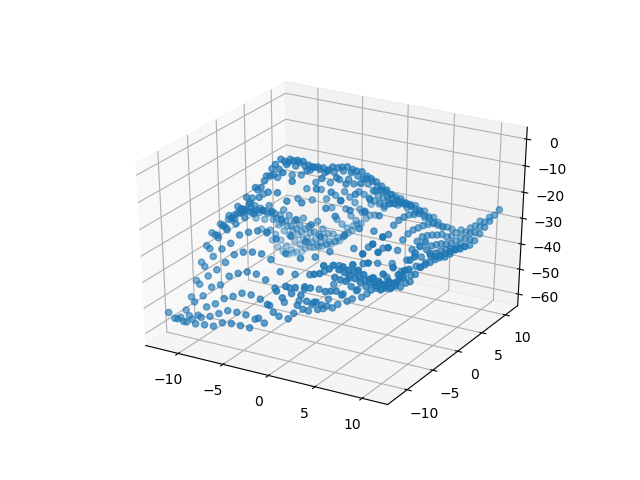

In [24]:
# a=np.loadtxt('test')
a=np.load('peaks.npy')
data =  np.loadtxt('data.np')

a=a.astype(int)
a=np.array(a)

h_list=[]
a_list=[]
b_list=[]
peak=a[2]
size=12
x,y=generate_2D_linespace(startx=peak[0]-size,stopx=peak[0]+size,starty=peak[1]-size,stopy=peak[1]+size,step=1)

z=[]
for i in range(len(x)):
    z.append(data[x[i],y[i]])
x=x-peak[0]
y=y-peak[1]

h=max(z)
z=np.array(z)
z=z-h
najmniejsze=np.sum(np.sort(z)[0:20])/20





x=np.array(x)

pop,var=fit_paraboloid(x,y,z)
show_fit(x=x,y=y,z=z,popt=pop)

In [25]:
najmniejsze

-56.326249999999916

array([ 1198.914,  1199.643,  1200.202,  1201.373,  1201.822,  1202.17 ,
        1202.455,  1202.738,  1202.874,  1203.293,  1203.309,  1203.616,
        1203.645,  1203.783,  1204.161,  1204.274,  1204.532,  1204.618,
        1204.864,  1204.929])